Lagu terpopuler berdasarkan Total Streams:
Position                                                           1
Artist Name                                              Post Malone
Song Name                 Sunflower  SpiderMan: Into the SpiderVerse
Days                                                            1506
Top 10 (xTimes)                                                302.0
Peak Position                                                      1
Peak Position (xTimes)                                         (x29)
Peak Streams                                                 2118242
Total Streams                                              883369738
Name: 0, dtype: object
Position                            5
Artist Name               Post Malone
Song Name                    rockstar
Days                             1223
Top 10 (xTimes)                 186.0
Peak Position                       1
Peak Position (xTimes)         (x124)
Peak Streams                  2905678
Total Str

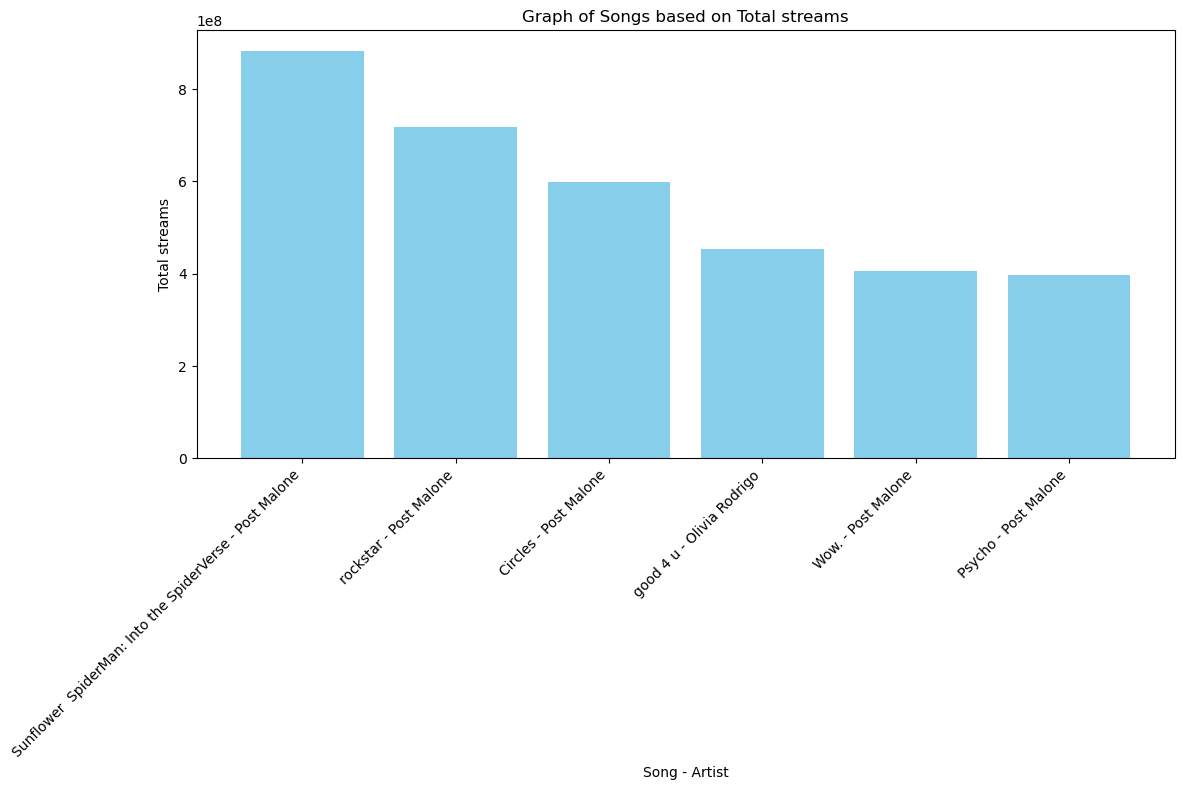

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('spotify.csv')

# Membersihkan spasi ekstra di nama artis
data['Artist Name'] = data['Artist Name'].str.strip()

# Fungsi rekursif untuk mencari lagu dengan solusi optimal secara brute force
def algoritma(data, criteria='total_streams', current_index=0, current_combination=None, best_combination=None, best_value=0):
    if current_combination is None:
        current_combination = []

    if current_index == len(data):
        current_value = sum(row['Total Streams'] for row in current_combination)
        if current_value > best_value:
            return current_combination, current_value
        else:
            return best_combination, best_value

    # Coba lagu saat ini masuk atau tidak masuk ke dalam kombinasi
    without_current_song = algoritma(data, criteria, current_index + 1, current_combination, best_combination, best_value)
    with_current_song = algoritma(data, criteria, current_index + 1, current_combination + [data.iloc[current_index]], best_combination, best_value)

    # Pilih kombinasi dengan nilai terbaik
    if with_current_song[1] > without_current_song[1]:
        return with_current_song
    else:
        return without_current_song

# Fungsi untuk menampilkan grafik berdasarkan kriteria tertentu
def plot_graph(data, criteria='total_streams'):
    x = data['Song Name'] + ' - ' + data['Artist Name']  # Combine song name and artist name
    y = data[criteria]

    plt.figure(figsize=(12, 8))
    plt.bar(x, y, color='skyblue')
    plt.xlabel('Song - Artist')
    plt.ylabel(criteria.capitalize())
    plt.title(f'Graph of Songs based on {criteria.capitalize()}')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Fungsi untuk menerapkan batasan dan menampilkan hasil dengan deskripsi lengkap
# Fungsi untuk menerapkan batasan dan menampilkan hasil dengan deskripsi lengkap
# Fungsi untuk menerapkan batasan dan menampilkan hasil dengan deskripsi lengkap
def apply_and_display_constraints(data, constraints=None):
    if constraints is None:
        constraints = {}

    filtered_data = data.copy()

    for criterion, value in constraints.items():
        if criterion == 'stream_min' and 'Total Streams' in filtered_data.columns:
            filtered_data = filtered_data[filtered_data['Total Streams'] > value]
        elif criterion == 'days_min' and 'Days' in filtered_data.columns:
            filtered_data = filtered_data[filtered_data['Days'] > value]
        elif criterion == 'artists' and 'Artist Name' in filtered_data.columns:
            # Membersihkan spasi ekstra di nama artis dalam batasan
            value = [artist.strip() for artist in value]
            filtered_data = filtered_data[filtered_data['Artist Name'].isin(value)]
        elif criterion == 'peak_position' and 'Peak Position' in filtered_data.columns:
            filtered_data = filtered_data[filtered_data['Peak Position'] == value]
        elif criterion == 'top_10_entries' and 'Top 10 (xTimes)' in filtered_data.columns:
            # Ensure the column exists before applying the filter
            filtered_data = filtered_data[filtered_data['Top 10 (xTimes)'] > value]

    # Menampilkan hasil dengan deskripsi lengkap
    if not filtered_data.empty:
        print(f"Lagu terpopuler berdasarkan {'Total Streams'}:")
        optimal_combination, total_value = algoritma(filtered_data, criteria='Total Streams')
        for row in optimal_combination:
            print(row)

        print("\nDeskripsi lengkap:")
        print(f"Total {'Total Streams'}: {total_value}")

        # Menjalankan fungsi plot untuk data yang telah difilter
        plot_graph(filtered_data, criteria='Total Streams')
    else:
        print("Tidak ada data yang memenuhi kriteria.")

# Contoh penggunaan batasan umum
common_constraints = {
    'stream_min': 1,
    'days_min': 100,
    'artists': ['Olivia Rodrigo', 'Lewis Capaldi', 'Post Malone'],
    'top_10_entries': 100,
    'peak_position': 1,
}

apply_and_display_constraints(data, common_constraints)
